# SWiT Other Analsysis.

**Authors:** Artan Salihu, Stefan Schwarz, Markus Rupp

**Paper:** [SWiT](https://arxiv.org/abs/2302.07000).

**Outline of the document:**
1. Spotter.
2. TSne.
3. Locator.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ars205/TBC.ipynb)


# 1. Load librarier and other dependencies.

In [1]:
# --- imports ---- #
from google.colab import files
!pip install --upgrade --no-cache-dir gdown
import gdown
import sys
!pip install einops
import matplotlib.pyplot as plt
from matplotlib import container
import pandas as pd
import seaborn as sns
from tqdm import tqdm


  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.3 MB/s eta 0:00:00


In [ ]:
# @title [RUN] Mount Google Drive
# @markdown If a folder is added to the personal GDrive, mount the drive - path. Otherwise, SKIP it; use a locally downloaded folder.

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Check resources
## Check allocated resources

#### GPU ####
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

### Memory ####
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Mounted at /content/drive
Tue Sep 26 17:14:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                              

In [2]:
### ------ 1.1 Clone git repo ------- ###

#f download links do not work - copy and paste to the browser, then load locally.

clone_git_repo = True #@param {type:"boolean"}

if clone_git_repo == True:
  print("You have selected to download packages from github.")
  !git clone https://github.com/ars205/ssl_wireless

sys.path.append('./')
sys.path.append('./ssl_wireless')

%cd ssl_wireless

You have selected to download packages from github.
Cloning into 'ssl_wireless'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 61 (delta 12), reused 57 (delta 8), pack-reused 0
Receiving objects: 100% (61/61), 5.69 MiB | 4.70 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/ssl_wireless


In [13]:
### ------ 1.2 Download datasets ------ ###

#f download links do not work - copy and paste to the browser, then load locally.


load_type = "from url" #@param ["upload locally", "from url"] {allow-input: false, type:"string"}
dataset_type = "9k samples" #@param ["9k samples", "63k samples","Combined samples"] {allow-input: false, type:"string"}

if load_type == "upload locally":
  uploaded = files.upload()
else:
  dataset_path = './datasets/Book_nlos_linear/'

  if dataset_type == '9k samples':
    print('Downloading 9k ura nlos lab')
    url_csi = 'https://drive.google.com/file/d/1Wm4RT-tYvXfuOJpUvy1qzj0gRHYGJ725/view?usp=sharing'
    url_loc = 'https://drive.google.com/file/d/1KwGAinTlirS9HQT8ywN44hZcaVmNPxhu/view?usp=sharing'
  elif dataset_type == 'Combined samples':
    print('Downloading Combined dataset')
    url_csi = 'https://drive.google.com/file/d/1uM2X6x18Z2v4kn5c4Q-YbEVu65YdfUZh/view?usp=sharing'
    url_loc = 'https://drive.google.com/file/d/1KcpbiM72BPmumyJzIysbIzLvz6YjCP4a/view?usp=sharing'
  elif dataset_type == '63k samples':
    print('Downloading 63k ura nlos lab')
    url_csi = 'https://drive.google.com/file/d/1-RQ9G9AswNu3KT8g-92iF9QvJQ_fCMkR/view?usp=sharing'
    url_loc = 'https://drive.google.com/file/d/1-PbN4TdcGuR9ogXQVSSK-aEClLzANhZe/view?usp=sharing'
  else:
    print("Download you own data.")
gdown.download(url_csi, dataset_path, quiet=False,fuzzy=True)
gdown.download(url_loc, dataset_path, quiet=False,fuzzy=True)


Downloading...
From (uriginal): https://drive.google.com/uc?id=1Wm4RT-tYvXfuOJpUvy1qzj0gRHYGJ725
From (redirected): https://drive.google.com/uc?id=1Wm4RT-tYvXfuOJpUvy1qzj0gRHYGJ725&confirm=t&uuid=94259a4c-a10b-49d7-a9cf-b4885010600c
To: /content/ssl_wireless/datasets/Book_nlos_linear/kuluwen_URA_lab_nLoS_CSI_9k.npy
100%|██████████| 1.43G/1.43G [00:25<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KwGAinTlirS9HQT8ywN44hZcaVmNPxhu
To: /content/ssl_wireless/datasets/Book_nlos_linear/kuluwen_URA_lab_nLoS_LOC_9k.npy
100%|██████████| 224k/224k [00:00<00:00, 106MB/s]


'./datasets/Book_nlos_linear/kuluwen_URA_lab_nLoS_LOC_9k.npy'

In [ ]:
#%cd ..


/content/wireless_ssl


In [4]:
!pwd

/content/ssl_wireless


### If you have it locally. CD to Dir.

In [ ]:
# %cd /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/19_01_SWiT
# %pwd

/content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/19_01_SWiT


'/content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/19_01_SWiT'

In [10]:
### ------ 1.3 Download models ------ ###

#f download links do not work - copy and paste to the browser, then load locally.
import os

load_type = "from url" #@param ["upload locally", "from url"] {allow-input: false, type:"string"}

if load_type == "upload locally":
  uploaded = files.upload()
else:
  model_1_path_file = './saved_models/Book_nlos_linear/model_SWiT.pth'
  model_1_path = './saved_models/Book_nlos_linear'
  if not os.path.exists(model_1_path):
    os.makedirs(model_1_path)
  model_1 = 'https://drive.google.com/file/d/1GWxpevuL9susuOXHSgp51wRSPigeNA64/view?usp=sharing'
gdown.download(model_1, model_1_path_file, quiet=False,fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1GWxpevuL9susuOXHSgp51wRSPigeNA64
From (redirected): https://drive.google.com/uc?id=1GWxpevuL9susuOXHSgp51wRSPigeNA64&confirm=t&uuid=2ce9a01b-d410-4faa-963c-6ef16d70099b
To: /content/ssl_wireless/saved_models/Book_nlos_linear/model_SWiT.pth
100%|██████████| 186M/186M [00:01<00:00, 175MB/s]


'./saved_models/Book_nlos_linear/model_SWiT.pth'

# 1. TSne.

In [6]:
# For LaTeX, first apt install texlive.
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False


In [7]:
%pwd

'/content/ssl_wireless'

In [ ]:
# For LaTeX.
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended


***Configuration****
 
 experiment_name: Book_nlos_linear
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: combined_data_kul_tsne_testing.npy
sub_dataset_file_loc: combined_labels_kul_tsne_testing.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_path: ./saved_models/Book_nlos_linear/checkpoint.pth
train_val_batchsize: 512
knn: 20
c_spots: 12
pth_names_classifier: ['checkpoint0136']
h_slice: (64, 1)


 /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
Dataset main path is /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS


******** Dataset Selected is URA_lab_nLoS************


(9334, 64, 100, 3) (9334, 3)
Shapes: ((6023, 64, 100, 3), (6023, 3), (100, 64, 100, 3), (100, 3), (100, 64, 100, 3), (100, 3))
Train

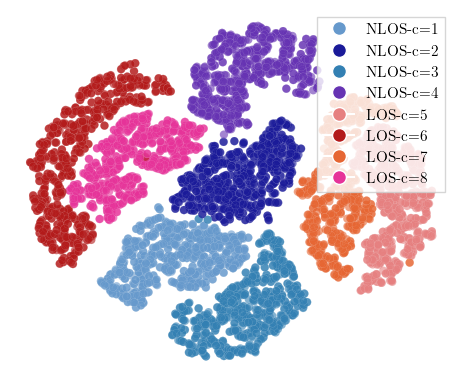

<Figure size 640x480 with 0 Axes>

In [ ]:
%run book_chapter_tsne_combined.py

***Configuration****
 
 experiment_name: Book_nlos_linear
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: combined_data_kul_tsne_testing.npy
sub_dataset_file_loc: combined_labels_kul_tsne_testing.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_path: ./saved_models/Book_nlos_linear/checkpoint.pth
train_val_batchsize: 512
knn: 20
c_spots: 12
pth_names_classifier: ['RANDOM']
h_slice: (64, 1)


 /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
Dataset main path is /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS


******** Dataset Selected is URA_lab_nLoS************


(9334, 64, 100, 3) (9334, 3)
Shapes: ((6023, 64, 100, 3), (6023, 3), (100, 64, 100, 3), (100, 3), (100, 64, 100, 3), (100, 3))
Train Data: 6

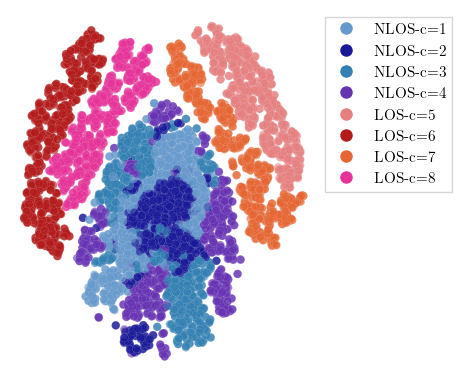

<Figure size 640x480 with 0 Axes>

In [ ]:
%run book_chapter_tsne_combined.py

***Configuration****
 
 experiment_name: Book_nlos_linear
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: combined_data_kul_tsne_testing.npy
sub_dataset_file_loc: combined_labels_kul_tsne_testing.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_path: ./saved_models/Book_nlos_linear/checkpoint.pth
train_val_batchsize: 512
knn: 20
c_spots: 12
pth_names_classifier: ['RANDOm']
h_slice: (64, 1)


 /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
Dataset main path is /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS


******** Dataset Selected is URA_lab_nLoS************


(9334, 64, 100, 3) (9334, 3)
Shapes: ((6023, 64, 100, 3), (6023, 3), (100, 64, 100, 3), (100, 3), (100, 64, 100, 3), (100, 3))
Train Data: 6

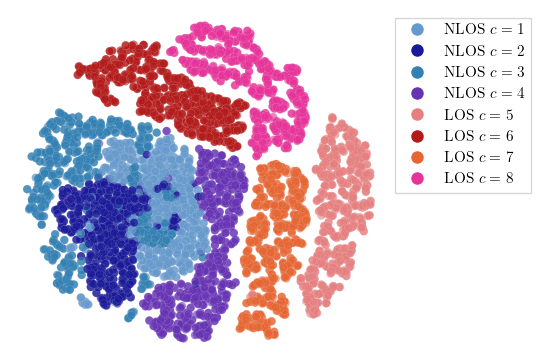

<Figure size 640x480 with 0 Axes>

In [ ]:
# Combined for TSNE with Random Weights.
%run book_chapter_tsne_combined.py

***Configuration****
 
 experiment_name: Book_nlos_linear
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: combined_data_kul_tsne_testing.npy
sub_dataset_file_loc: combined_labels_kul_tsne_testing.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_path: ./saved_models/Book_nlos_linear/checkpoint.pth
train_val_batchsize: 512
knn: 20
c_spots: 12
pth_names_classifier: ['checkpoint0136']
h_slice: (64, 1)


 /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
Dataset main path is /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS


******** Dataset Selected is URA_lab_nLoS************


(9334, 64, 100, 3) (9334, 3)
Shapes: ((6023, 64, 100, 3), (6023, 3), (100, 64, 100, 3), (100, 3), (100, 64, 100, 3), (100, 3))
Train

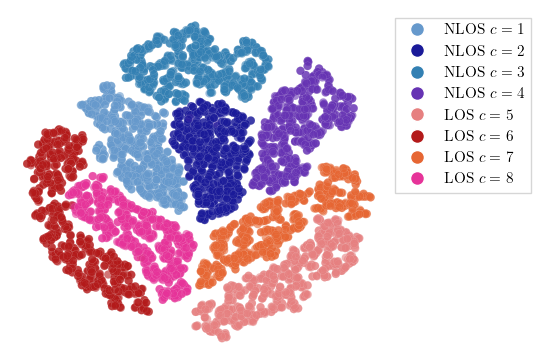

<Figure size 640x480 with 0 Axes>

In [ ]:
# Combined with tsne with SWiT.
%run book_chapter_tsne_combined.py

# 2. Spotter

***Configuration****
 
 experiment_name: Book_nlos_linear
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/ssl_wireless/datasets/Book_nlos_linear
sub_dataset_file_csi: kuluwen_URA_lab_nLoS_CSI_9k.npy
sub_dataset_file_loc: kuluwen_URA_lab_nLoS_LOC_9k.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_path: ./saved_models/Book_nlos_linear/checkpoint.pth
train_val_batchsize: 512
knn: 20
c_spots: 4
pth_names_classifier: ['Rand1', 'model_SWiT']
h_slice: (64, 1)


 /content/ssl_wireless/datasets/Book_nlos_linear
Dataset main path is /content/ssl_wireless/datasets


******** Dataset Selected is URA_lab_nLoS************


(9334, 64, 100, 3) (9334, 3)
Shapes: ((2334, 64, 100, 3), (2334, 3), (2000, 64, 100, 3), (2000, 3), (5000, 64, 100, 3), (5000, 3))
Train Data: 2334
Validation Data: 2000
Test Data: 5000
Unique spots for classification:  [0. 1. 2.

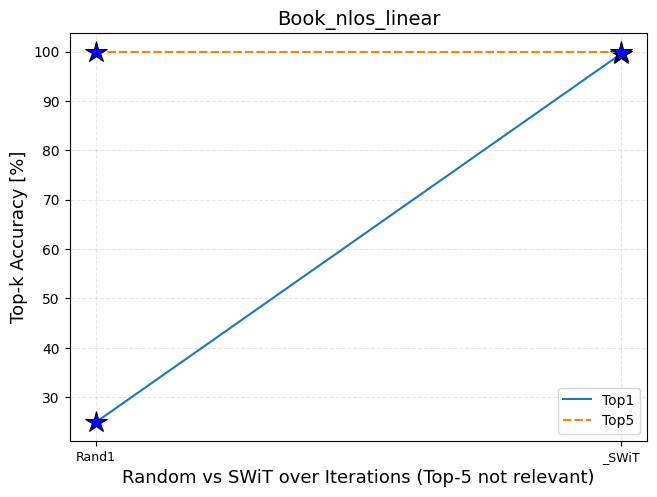

<Figure size 640x480 with 0 Axes>

In [14]:
### ------ 2.2 Run tester_classifier ---- ####
# Just make sure to use the appropriate dataset and set the number of classes. This is for individual datasets (LOS, NLOS, DIS).
# Need to adjust the code to make it work for the combined dataset (ChannelTransformation module).

%run tester_classifier.py

# 3. Locator

CHECKPOINT_PATH created:  ./saved_models/Book_nlos_fine_tuner
***Configuration****
 
 experiment_name: Book_nlos_fine_tuner
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: kuluwen_URA_lab_nLoS_CSI_9k.npy
sub_dataset_file_loc: kuluwen_URA_lab_nLoS_LOC_9k.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_pth: ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth
train_val_batchsize: 512
criterion: MSE
device: cuda
epochs_linear: 501
best_vloss: 1e-05
data_regimes: ['1k']
save_results: True
learning_rate_eval: 0.0003
h_slice: (64, 1)


 /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
Dataset main path is /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS


******** Dataset Selected is URA_lab_nLoS***********

100%|██████████| 5000/5000 [00:11<00:00, 436.70it/s]


MAE: 535.0654 m
RMSE: 622.1212 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 435.49it/s]


MAE: 555.9947 m
RMSE: 641.9099 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 434.89it/s]


MAE: 544.3879 m
RMSE: 632.1109 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 434.22it/s]


MAE: 566.0935 m
RMSE: 653.8382 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 431.56it/s]


MAE: 551.5908 m
RMSE: 638.5505 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 432.03it/s]


MAE: 522.1381 m
RMSE: 608.0776 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 436.06it/s]


MAE: 284.8977 m
RMSE: 341.9910 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 436.09it/s]


MAE: 283.3317 m
RMSE: 342.4102 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 437.74it/s]


MAE: 282.4196 m
RMSE: 338.9543 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 436.99it/s]


MAE: 287.6904 m
RMSE: 344.7877 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 432.55it/s]


MAE: 280.4226 m
RMSE: 335.8251 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_fine_tuner/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.

100%|██████████| 5000/5000 [00:11<00:00, 430.97it/s]


MAE: 284.5910 m
RMSE: 342.6950 m
   intensity     avg_mae    std_mae    avg_rmse   std_rmse  avg_num_points  \
0        0.1  545.878365  14.296661  632.768035  14.630836             451   
1        0.5  283.892171   2.252645  341.110557   2.917802            2238   

   epochs  
0     801  
1     801  


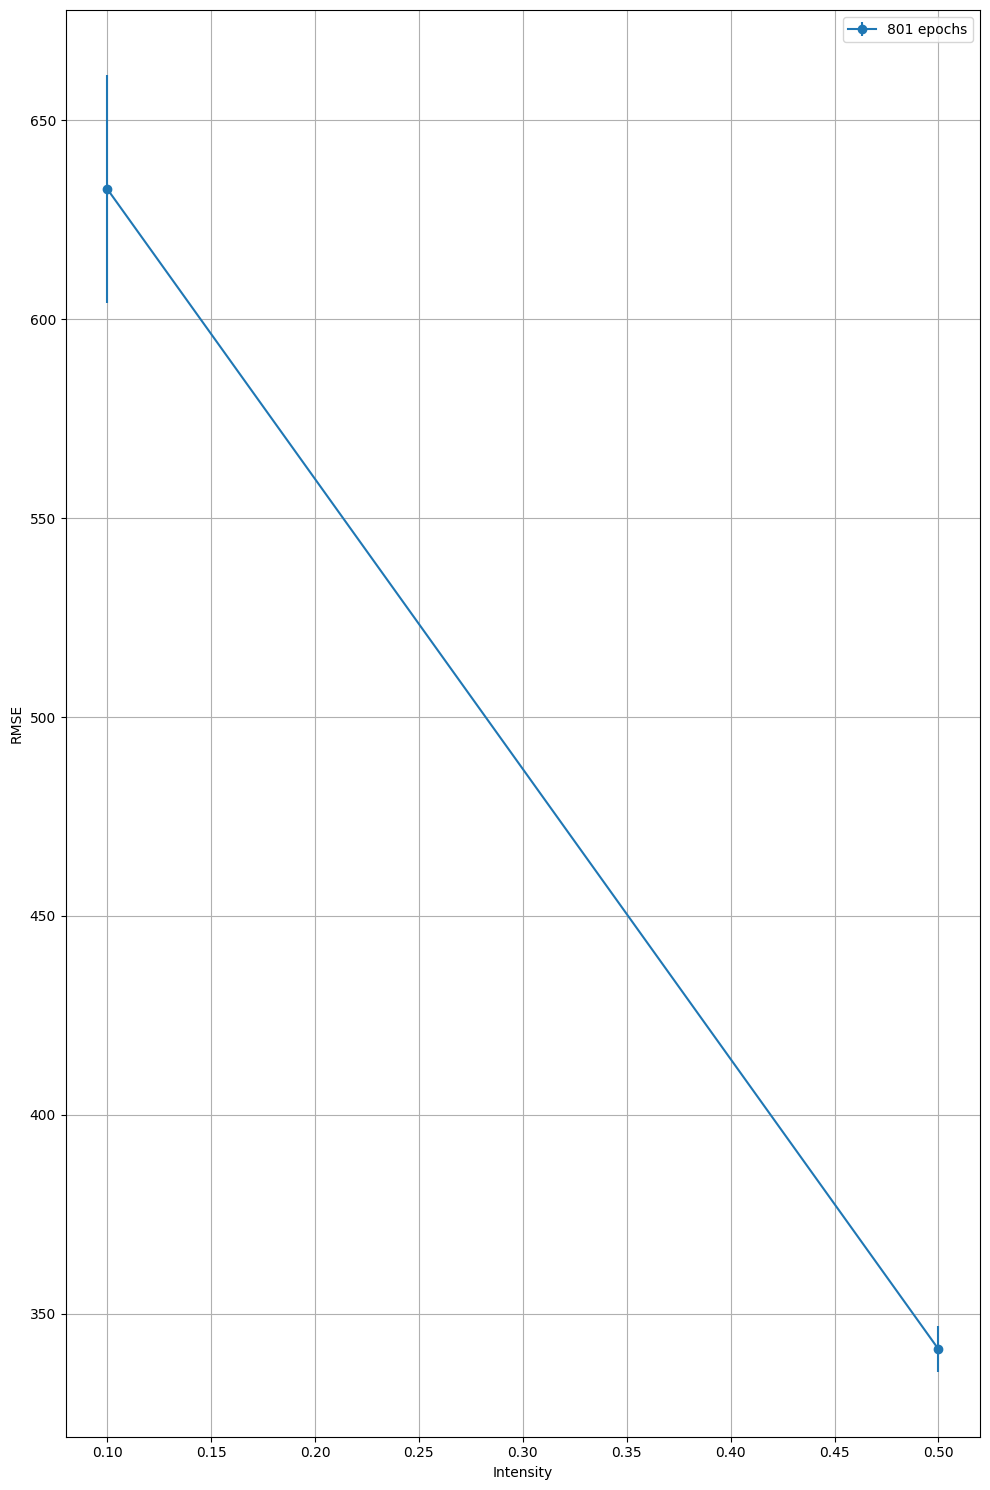

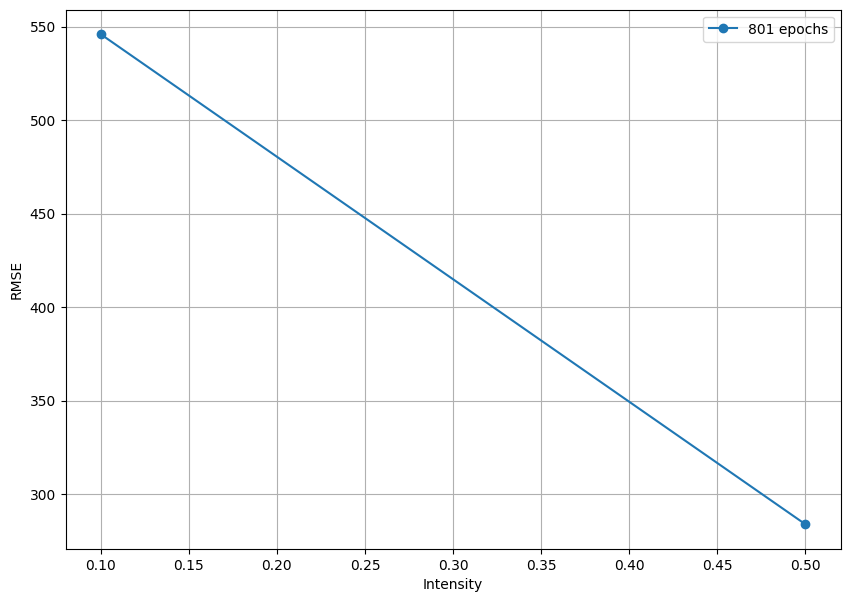

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bchap_linear_fine_tuner.py

There is no results path for this experiment. Thus, I will create a folder to store the results.

results path created:  ./results/Book_nlos_fine_tuner_Random
CHECKPOINT_PATH created:  ./saved_models/Book_nlos_fine_tuner_Random
***Configuration****
 
 experiment_name: Book_nlos_fine_tuner_Random
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: kuluwen_URA_lab_nLoS_CSI_9k.npy
sub_dataset_file_loc: kuluwen_URA_lab_nLoS_LOC_9k.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_pth: ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth
train_val_batchsize: 512
criterion: MSE
device: cuda
epochs_linear: 501
best_vloss: 1e-05
data_regimes: ['1k']
save_results: True
learning_rate_eval: 0.0003
h_slice: (64, 1)


 /content/drive/MyDrive/1. TUWien/1. A RESEAR

100%|██████████| 5000/5000 [00:11<00:00, 437.16it/s]


MAE: 761.2937 m
RMSE: 869.0102 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  460
Epoch : 1 - loss : 0.91516137 - acc : 0.00000000 - val_loss : 1.15569222 val_acc : 0.00000000 

Epoch : 11 - loss : 0.04106775 - acc : 0.00000000 - val_loss : 0.08029966 val_acc : 0.00000000 

Epoch : 21 - loss : 0.00902206 - acc : 0.00000000 - val_loss : 0.05418614 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00199441 - acc : 0.00000000 - val_loss : 0.04874385 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00051996 - acc : 0.00000000 - val_loss : 0.04817815 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00015352 - acc : 0.00000000 - val_loss : 0.04955154 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00005016 - acc : 0.00000000 - val_loss : 0.04

100%|██████████| 5000/5000 [00:11<00:00, 438.21it/s]


MAE: 688.0187 m
RMSE: 785.2069 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  431
Epoch : 1 - loss : 1.15850866 - acc : 0.00000000 - val_loss : 0.45584890 val_acc : 0.00000000 

Epoch : 11 - loss : 0.09314914 - acc : 0.00000000 - val_loss : 0.10546300 val_acc : 0.00000000 

Epoch : 21 - loss : 0.05825507 - acc : 0.00000000 - val_loss : 0.10773022 val_acc : 0.00000000 

Epoch : 31 - loss : 0.03290096 - acc : 0.00000000 - val_loss : 0.08889140 val_acc : 0.00000000 

Epoch : 41 - loss : 0.01449414 - acc : 0.00000000 - val_loss : 0.08014539 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00655995 - acc : 0.00000000 - val_loss : 0.07275851 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00213400 - acc : 0.00000000 - val_loss : 0.06

100%|██████████| 5000/5000 [00:11<00:00, 437.65it/s]


MAE: 762.1255 m
RMSE: 871.2083 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  472
Epoch : 1 - loss : 0.96005714 - acc : 0.00000000 - val_loss : 0.51091588 val_acc : 0.00000000 

Epoch : 11 - loss : 0.04255247 - acc : 0.00000000 - val_loss : 0.08970445 val_acc : 0.00000000 

Epoch : 21 - loss : 0.00942315 - acc : 0.00000000 - val_loss : 0.05727479 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00234036 - acc : 0.00000000 - val_loss : 0.04917905 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00063943 - acc : 0.00000000 - val_loss : 0.04910756 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00019391 - acc : 0.00000000 - val_loss : 0.04794153 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00006575 - acc : 0.00000000 - val_loss : 0.04

100%|██████████| 5000/5000 [00:11<00:00, 434.40it/s]


MAE: 678.5793 m
RMSE: 783.0911 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  448
Epoch : 1 - loss : 0.68153417 - acc : 0.00000000 - val_loss : 0.83902967 val_acc : 0.00000000 

Epoch : 11 - loss : 0.09001913 - acc : 0.00000000 - val_loss : 0.09462415 val_acc : 0.00000000 

Epoch : 21 - loss : 0.03729980 - acc : 0.00000000 - val_loss : 0.07573482 val_acc : 0.00000000 

Epoch : 31 - loss : 0.01205130 - acc : 0.00000000 - val_loss : 0.05859508 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00277513 - acc : 0.00000000 - val_loss : 0.05119707 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00072564 - acc : 0.00000000 - val_loss : 0.04893822 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00020435 - acc : 0.00000000 - val_loss : 0.04

100%|██████████| 5000/5000 [00:11<00:00, 435.81it/s]


MAE: 702.8161 m
RMSE: 797.0856 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  430
Epoch : 1 - loss : 0.76568317 - acc : 0.00000000 - val_loss : 0.50424355 val_acc : 0.00000000 

Epoch : 11 - loss : 0.09061719 - acc : 0.00000000 - val_loss : 0.10273513 val_acc : 0.00000000 

Epoch : 21 - loss : 0.05777179 - acc : 0.00000000 - val_loss : 0.08481047 val_acc : 0.00000000 

Epoch : 31 - loss : 0.02951962 - acc : 0.00000000 - val_loss : 0.07444516 val_acc : 0.00000000 

Epoch : 41 - loss : 0.01051894 - acc : 0.00000000 - val_loss : 0.06358553 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00273747 - acc : 0.00000000 - val_loss : 0.06123098 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00101346 - acc : 0.00000000 - val_loss : 0.05

100%|██████████| 5000/5000 [00:11<00:00, 431.86it/s]


MAE: 753.2930 m
RMSE: 861.3591 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  2327
Epoch : 1 - loss : 0.63602996 - acc : 0.00000000 - val_loss : 0.15614474 val_acc : 0.00000000 

Epoch : 11 - loss : 0.05472935 - acc : 0.00000000 - val_loss : 0.06498687 val_acc : 0.00000000 

Epoch : 21 - loss : 0.02281000 - acc : 0.00000000 - val_loss : 0.03456381 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00768007 - acc : 0.00000000 - val_loss : 0.01921991 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00381212 - acc : 0.00000000 - val_loss : 0.01667685 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00239619 - acc : 0.00000000 - val_loss : 0.01594329 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00155909 - acc : 0.00000000 - val_loss : 0.0

100%|██████████| 5000/5000 [00:11<00:00, 430.29it/s]


MAE: 346.6746 m
RMSE: 415.2955 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  2265
Epoch : 1 - loss : 0.56759512 - acc : 0.00000000 - val_loss : 0.18272126 val_acc : 0.00000000 

Epoch : 11 - loss : 0.04144715 - acc : 0.00000000 - val_loss : 0.04909078 val_acc : 0.00000000 

Epoch : 21 - loss : 0.01162590 - acc : 0.00000000 - val_loss : 0.02018880 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00503144 - acc : 0.00000000 - val_loss : 0.01511565 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00278677 - acc : 0.00000000 - val_loss : 0.01356993 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00170025 - acc : 0.00000000 - val_loss : 0.01266092 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00110518 - acc : 0.00000000 - val_loss : 0.0

100%|██████████| 5000/5000 [00:11<00:00, 433.59it/s]


MAE: 360.5372 m
RMSE: 424.4689 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  2266
Epoch : 1 - loss : 0.38125834 - acc : 0.00000000 - val_loss : 0.11706048 val_acc : 0.00000000 

Epoch : 11 - loss : 0.03102972 - acc : 0.00000000 - val_loss : 0.03561510 val_acc : 0.00000000 

Epoch : 21 - loss : 0.00767886 - acc : 0.00000000 - val_loss : 0.01671296 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00349141 - acc : 0.00000000 - val_loss : 0.01467052 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00188944 - acc : 0.00000000 - val_loss : 0.01267516 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00106686 - acc : 0.00000000 - val_loss : 0.01212567 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00063676 - acc : 0.00000000 - val_loss : 0.0

100%|██████████| 5000/5000 [00:11<00:00, 436.43it/s]


MAE: 354.2769 m
RMSE: 421.4379 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  2242
Epoch : 1 - loss : 0.35525000 - acc : 0.00000000 - val_loss : 0.30838707 val_acc : 0.00000000 

Epoch : 11 - loss : 0.08206342 - acc : 0.00000000 - val_loss : 0.08220921 val_acc : 0.00000000 

Epoch : 21 - loss : 0.02480726 - acc : 0.00000000 - val_loss : 0.03483805 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00625970 - acc : 0.00000000 - val_loss : 0.01876566 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00266276 - acc : 0.00000000 - val_loss : 0.01456859 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00139669 - acc : 0.00000000 - val_loss : 0.01384898 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00078822 - acc : 0.00000000 - val_loss : 0.0

100%|██████████| 5000/5000 [00:11<00:00, 435.25it/s]


MAE: 345.4642 m
RMSE: 411.1987 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  2251
Epoch : 1 - loss : 0.38620079 - acc : 0.00000000 - val_loss : 0.16035381 val_acc : 0.00000000 

Epoch : 11 - loss : 0.03403773 - acc : 0.00000000 - val_loss : 0.04424201 val_acc : 0.00000000 

Epoch : 21 - loss : 0.00864462 - acc : 0.00000000 - val_loss : 0.02013286 val_acc : 0.00000000 

Epoch : 31 - loss : 0.00357774 - acc : 0.00000000 - val_loss : 0.01629056 val_acc : 0.00000000 

Epoch : 41 - loss : 0.00181223 - acc : 0.00000000 - val_loss : 0.01512854 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00100976 - acc : 0.00000000 - val_loss : 0.01491834 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00064776 - acc : 0.00000000 - val_loss : 0.0

100%|██████████| 5000/5000 [00:11<00:00, 438.27it/s]


MAE: 347.3957 m
RMSE: 415.6468 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x64 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_fine_tuner_Random/RANDOM.pth

Set `--weights_path` argument to the path of the reference model.


 => *****No reference model is found. Use random weights.*****


Number of points:  2227
Epoch : 1 - loss : 0.33757997 - acc : 0.00000000 - val_loss : 0.12668636 val_acc : 0.00000000 

Epoch : 11 - loss : 0.09739985 - acc : 0.00000000 - val_loss : 0.09529959 val_acc : 0.00000000 

Epoch : 21 - loss : 0.09249315 - acc : 0.00000000 - val_loss : 0.09399828 val_acc : 0.00000000 

Epoch : 31 - loss : 0.08042464 - acc : 0.00000000 - val_loss : 0.08710507 val_acc : 0.00000000 

Epoch : 41 - loss : 0.03257614 - acc : 0.00000000 - val_loss : 0.04328514 val_acc : 0.00000000 

Epoch : 51 - loss : 0.00768365 - acc : 0.00000000 - val_loss : 0.01922125 val_acc : 0.00000000 

Epoch : 61 - loss : 0.00316233 - acc : 0.00000000 - val_loss : 0.0

100%|██████████| 5000/5000 [00:11<00:00, 438.17it/s]


MAE: 337.4510 m
RMSE: 402.8371 m
   intensity     avg_mae    std_mae    avg_rmse   std_rmse  avg_num_points  \
0        0.1  724.354387  35.374564  827.826864  39.718186             430   
1        0.5  348.633250   7.234291  415.147483   6.998425            2227   

   epochs  
0     801  
1     801  


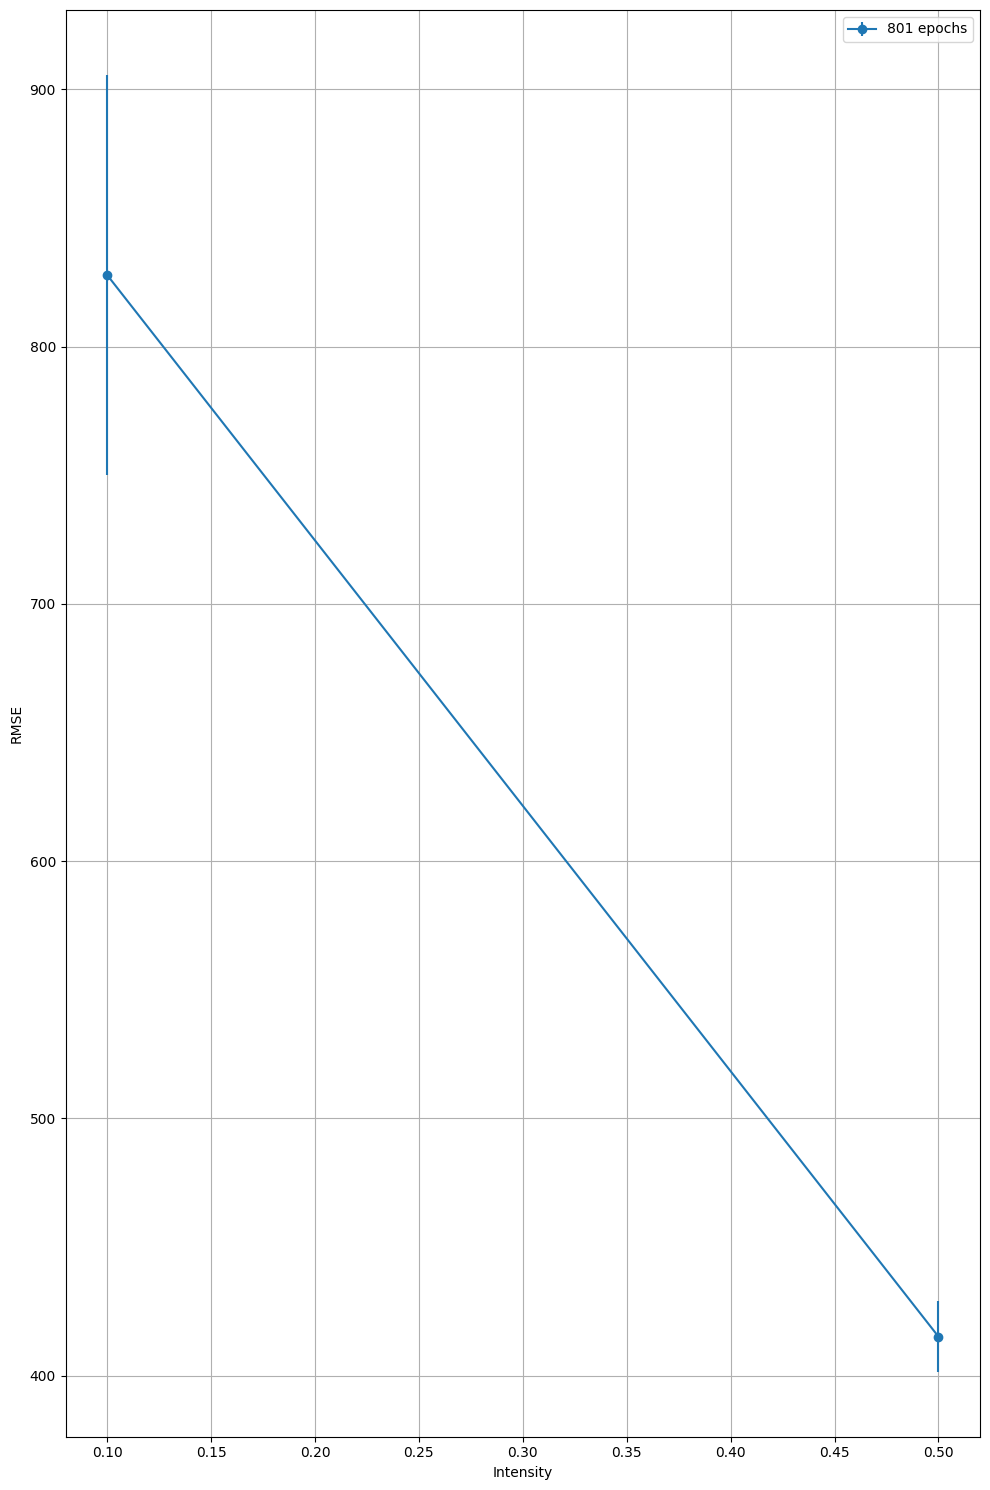

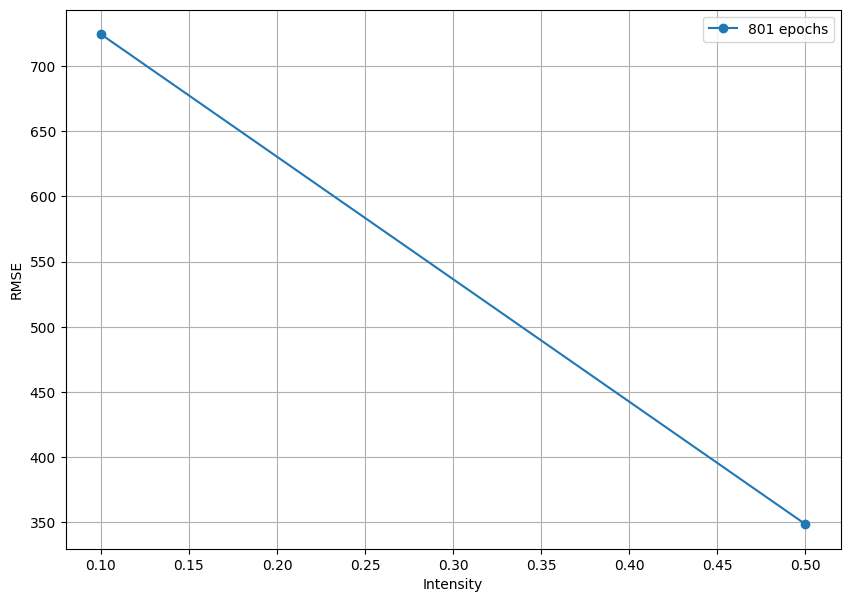

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bchap_linear_fine_tuner.py

<module 'models.ChannelTransformationModule' from '/content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/19_01_SWiT/models/ChannelTransformationModule.py'>
There is no results path for this experiment. Thus, I will create a folder to store the results.

results path created:  ./results/Book_nlos_linear
CHECKPOINT_PATH created:  ./saved_models/Book_nlos_linear
***Configuration****
 
 experiment_name: Book_nlos_linear
dataset_to_download: URA_lab_nLoS
saved_dataset_path: /content/drive/MyDrive/1. TUWien/1. A RESEARCH/8. EXPERIMENTS/KU_Luwen_Dataset
sub_dataset_file_csi: kuluwen_URA_lab_nLoS_CSI_9k.npy
sub_dataset_file_loc: kuluwen_URA_lab_nLoS_LOC_9k.npy
realMax: 0.071470265481
imagMax: 0.071470265481
absMax: 0.0804657278138
model_name: wit
encoder: targ_encoder
number_antennas: 64
total_subcarriers: 100
eval_subcarriers: 32
weights_pth: ./saved_models/Book_nlos_linear/checkpoint0136.pth
train_val_batchsize: 512
criterion: MSE
device: cuda
epochs_linear: 501
best_vloss: 1e-05
dat

100%|██████████| 5000/5000 [00:04<00:00, 1199.61it/s]


MAE: 562.3003 m
RMSE: 641.4665 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1200.47it/s]


MAE: 561.7795 m
RMSE: 635.7294 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1200.64it/s]


MAE: 555.4277 m
RMSE: 630.4035 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1190.20it/s]


MAE: 546.1851 m
RMSE: 623.4533 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1192.05it/s]


MAE: 574.6866 m
RMSE: 657.8868 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1203.47it/s]


MAE: 579.4804 m
RMSE: 658.4677 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1201.39it/s]


MAE: 494.9810 m
RMSE: 561.2801 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1203.74it/s]


MAE: 497.9834 m
RMSE: 564.5371 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1205.65it/s]


MAE: 498.4935 m
RMSE: 564.2156 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1189.89it/s]


MAE: 493.9693 m
RMSE: 561.7004 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1215.00it/s]


MAE: 495.6296 m
RMSE: 562.6965 m


 ***** 0. Reset Pre-trained model *****

Model wit 64x1 built.

Weights that are supposed to find at : 
 ./saved_models/Book_nlos_linear/checkpoint0136.pth

Take key targ_encoder in provided checkpoint dict


 =>Weights are found at ./saved_models/Book_nlos_linear/checkpoint0136.pth and are loaded with msg: _IncompatibleKeys(missing_keys=['head.weight', 'head.bias'], unexpected_keys=['pool_head.lid_token', 'pool_head.pooling_blocks.0.norm1.weight', 'pool_head.pooling_blocks.0.norm1.bias', 'pool_head.pooling_blocks.0.attn.q.weight', 'pool_head.pooling_blocks.0.attn.q.bias', 'pool_head.pooling_blocks.0.attn.k.weight', 'pool_head.pooling_blocks.0.attn.k.bias', 'pool_head.pooling_blocks.0.attn.v.weight', 'pool_head.pooling_blocks.0.attn.v.bias', 'pool_head.pooling_blocks.0.attn.proj.weight', 'pool_head.pooling_blocks.0.attn.proj.bias', 'pool_head.pooling_blocks.0.norm2.weight', 'pool_head.pooling_blocks.0.norm2.bias', 'pool_head.pooling_blocks.0.mlp.fc1.w

100%|██████████| 5000/5000 [00:04<00:00, 1193.63it/s]


MAE: 493.9211 m
RMSE: 560.5585 m
   intensity     avg_mae    std_mae    avg_rmse   std_rmse  avg_num_points  \
0        0.1  563.309940  11.177821  641.234542  13.153745             442   
1        0.5  495.829666   1.807326  562.498046   1.473570            2179   

   epochs  
0     801  
1     801  


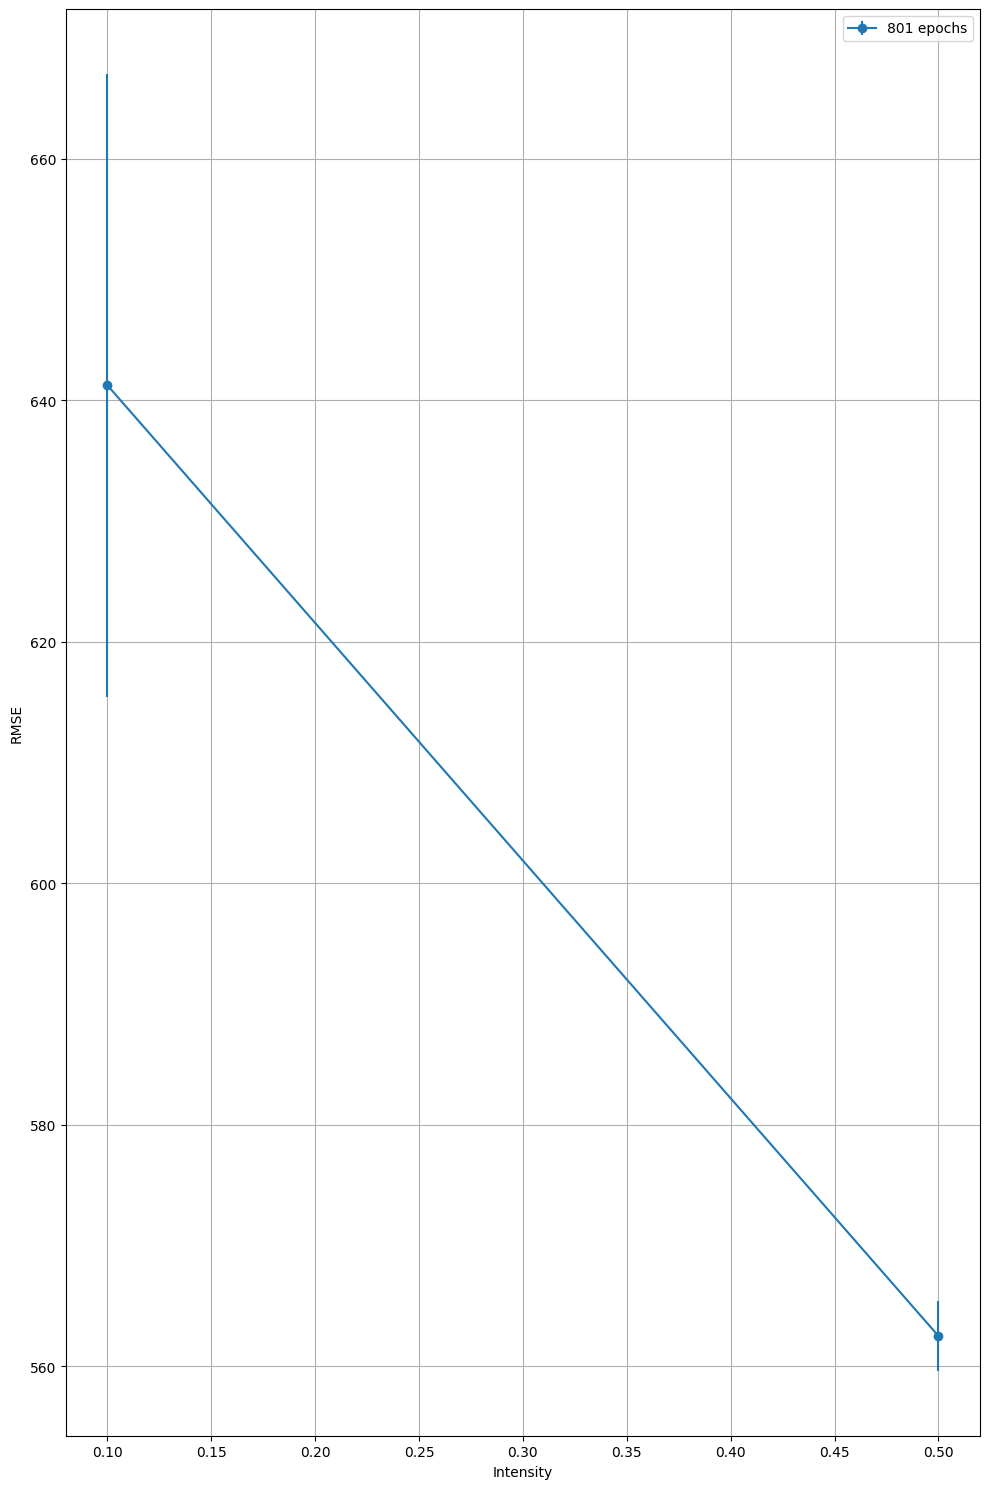

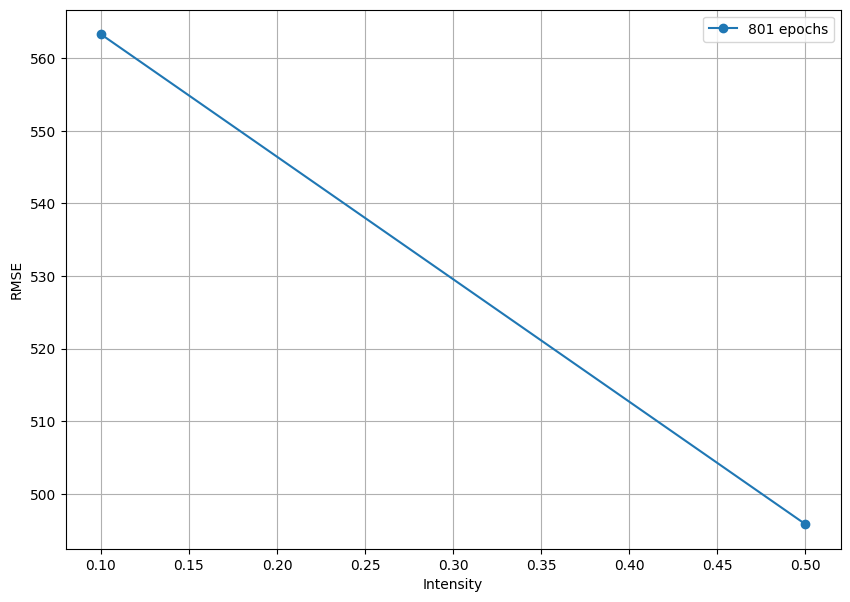

<Figure size 640x480 with 0 Axes>

In [ ]:
%run bchap_linear.py

In [ ]:
# !zip -r /content/wireless_ssl/saved_models/KUL_NLOS_w_aug_Example_63k_7.zip /content/wireless_ssl/saved_models/KUL_NLOS_w_aug_Example_63k_7

# from google.colab import files
# files.download("/content/wireless_ssl/saved_models/KUL_NLOS_w_aug_Example_63k_7.zip")
